# Gather

**Progammatically download tsv file**

In [191]:
import requests, re, os, pandas as pd, numpy as np, json, tweepy, matplotlib.pyplot as plt




In [192]:
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [193]:
with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [194]:
os.listdir(folder_name)

['twitter-archive-enhanced.csv',
 '.DS_Store',
 'likes_over_time.png',
 'rating_by_breed.png',
 'twitter_archive_master.csv',
 'image-predictions.tsv',
 'tweet_json.txt']

In [195]:
#import files 

twitter_archive = pd.read_csv('data/twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('data/image-predictions.tsv', delimiter='\t')

**Gather data from Twitter API**

In [197]:
#authenticate to twitter api

consumer_key = '*'
consumer_secret = '*'
access_token = '*'
access_secret = '*'

twitter_archive = pd.read_csv('data/twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('data/image-predictions.tsv', delimiter='\t')

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [196]:
#create df of tweet_ids from the twitter_archive file
tweet_id = twitter_archive.tweet_id
tweet_id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64

In [190]:
#loop through tweet id's and store status information to a text file

with open('tweet_json.txt', 'w') as outfile:
    for unique_id in tweet_id:
        try:
            tweet = api.get_status(unique_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except Exception as e:
            print(unique_id)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110199369728
882045870035

820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185828864
818145370475810820
817908911860748288
817827839487737858
817777686764523521
817536400337801217
817502432452313088
817423860136083457
817415592588222464
817181837579653120
817171292965273600
817120970343411712
817056546584727552
816829038950027264
816816676327063552
816697700272001025
816450570814898180
816336735214911488
816091915477250048
816062466425819140
816014286006976512
815990720817401858
815966073409433600
815745968457060357
815736392542261248
815639385530101762
815390420867969024
814986499976527872
814638523311

758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
754874841593970688
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
754011816964026368
753655901052166144
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
752682090207055872
752660715232722944
752568224206688256
752519690950500352
752334515931054080
752309394570878976
752173152931807232
751950017322246144
751937170840121344
751830394383790080
751793661361

705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748819968
704134088924532736
704113298707505153
704054845121142784
703774238772166656
703769065844768768
703631701117943808
703611486317502464
703425003149250560
703407252292673536
703382836347330562
703356393781329922
703268521220972544
703079050210877440
703041949650034688
702932127499816960
702899151802126337
702684942141153280
702671118226825216
702598099714314240
702539513671897089
702332542343577600
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865
701805642395348998
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244103680
700864154249383937
700847567345688576
700796979434098688
700747788515020802
700518061187

678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327029250
677698403548192770
677687604918272002
677673981332312066
677662372920729601
677644091929329666
677573743309385728
677565715327688705
677557565589463040
677547928504967168
677530072887205888
677335745548390400
677334615166730240
677331501395156992
677328882937298944
677314812125323265
677301033169788928
677269281705472000
677228873407442944
677187300187611136
676975532580409345
676957860086095872
676949632774234114
676948236477857792
676946864479084545
676942428000112642
676936541936185344
676916996760600576
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
676593408224

668815180734689280
668779399630725120
668655139528511488
668645506898350081
668643542311546881
668641109086707712
668636665813057536
668633411083464705
668631377374486528
668627278264475648
668625577880875008
668623201287675904
668620235289837568
668614819948453888
668587383441514497
668567822092664832
668544745690562560
668542336805281792
668537837512433665
668528771708952576
668507509523615744
668496999348633600
668484198282485761
668480044826800133
668466899341221888
668297328638447616
668291999406125056
668286279830867968
668274247790391296
668268907921326080
668256321989451776
668248472370458624
668237644992782336
668226093875376128
668221241640230912
668204964695683073
668190681446379520
668171859951755264
668154635664932864
668142349051129856
668113020489474048
667937095915278337
667924896115245057
667915453470232577
667911425562669056
667902449697558528
667886921285246976
667885044254572545
667878741721415682
667873844930215936
667866724293877760
667861340749471744
667832474953

In [198]:
#create empty list, loop through tweet status and append to list
tweets_info = []

for line in open('data/tweet_json.txt', 'r'):
    tweets_info.append(json.loads(line))
    
tweets_info[0]


{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [185]:
#create empty df, add variables stored in tweets_json.txt file
tweets_data = []
for x in tweets_info:
    tweets_data.append({'id': x['id'],
                       'retweet_count': int(x['retweet_count']),
                       'favorite_count':int(x['favorite_count'])})





In [186]:
tweets_df = pd.DataFrame(tweets_data, columns = ['id', 'retweet_count', 'favorite_count'])
tweets_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
id                2339 non-null int64
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


# Assess

**QUALITY ISSUES**

**Images table:**

1. p1 and p2 (predicted breed) values contain underscores, some are capitalized and some are not
2. Certain p1_dog, p2_dog, p3_dog columns are false, meaning the prediction was not a valid dog breed

**Tweets table:**

4. appear to be lots of typos with rating_numerator, as there are numerous ratings over 15 
5. certain tweets use denominators other than 10 for ratings
6. table has 181 tweets that contain a value for 'retweet_status_id', assume that these are retweets that should be excluded
7. typos in dog names, several 'a', 'the', 'an' etc. 
8. contains tweets with no related image 
9. drop retweet columns and other columns not necessary for analysis after removing retweet tweets
10. Change data types as appropriate
11. extract int values for ratings as float

**TIDINESS ISSUES**

1. information is contained in three separate tables (image info table, twitter archive, & tweets table)

**Tweets table:**
2. one variable (doggo, floofer, pupper, puppo) in 4 different columns 





**You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
Cleaning includes merging individual pieces of data according to the rules of tidy data.
The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.**

# Cleaning

In [199]:
#create a copy of original dataset as backup

image_predictions_copy = image_predictions.copy()
twitter_archive_copy = twitter_archive.copy()
tweets_df_copy = tweets_df.copy()


In [47]:
twitter_archive_copy.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [195]:
image_predictions_copy.head()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 28 columns):
tweet_id                      0 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     0 non-null object
source                        0 non-null object
text                          0 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 0 non-null object
rating_numerator              0 non-null int64
rating_denominator            0 non-null int64
name                          0 non-null object
doggo                         0 non-null object
floofer                       0 non-null object
pupper                        0 non-null object
puppo                         0 non-null object
jpg_url                       0 non-null object
img_num                       0 non-null int64

**QUALITY ISSUES - IMAGES TABLE**

**Define:**

2. Certain p1_dog, p2_dog, p3_dog columns are false, meaning the prediction was not a valid dog breed. 

Drop any rows where p1_dog = False (if the best prediction is not a dog breed, can assume p2 and p3 are also not dog breeds)

**Code:**

In [132]:
image_predictions_copy = image_predictions_copy.loc[lambda image_predictions_copy: image_predictions_copy['p1_dog']==True]

**Test:**

In [266]:
image_predictions_copy.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

**Define:**

1. p1 and p2 (predicted breed) values contain underscores, some are capitalized and some are not

Replace underscores with a space, make all characters lowercase

**Code**

In [133]:
#replace _ with space

image_predictions_copy.p1 = image_predictions_copy.p1.str.replace('_',' ')
image_predictions_copy.p2 = image_predictions_copy.p2.str.replace('_',' ')
image_predictions_copy.p3 = image_predictions_copy.p3.str.replace('_',' ')

# make all characters lowercase

image_predictions_copy.p1 = image_predictions_copy.p1.str.lower()
image_predictions_copy.p2 = image_predictions_copy.p2.str.lower()
image_predictions_copy.p3 = image_predictions_copy.p3.str.lower()

**Test**

In [268]:
image_predictions_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


**QUALITY ISSUES - TWEETS TABLE**

**Define**

4. appear to be lots of typos with rating_numerator, as there are numerous ratings over 15 

Remove records that have a rating_numerator over 15, assume these are outliers that will scew the data 

**Code**

In [134]:
twitter_archive_copy = twitter_archive_copy.loc[lambda twitter_archive_copy: twitter_archive_copy['rating_numerator']<=15]

**Test**

In [300]:
#confirm that no values are greater than 15

twitter_archive_copy.rating_numerator.max()

15

**Define**

5. certain tweets use denominators other than 10 for ratings

Remove tweets with denominator other than 10 

**Code**

In [135]:
twitter_archive_copy = twitter_archive_copy.loc[lambda twitter_archive_copy: twitter_archive_copy['rating_denominator']==10]

**Test**

In [275]:
twitter_archive_copy.rating_denominator.value_counts()

10    2323
Name: rating_denominator, dtype: int64

**Define**

6. table has 181 tweets that contain a value for 'retweet_status_id', assume that these are retweets that should be excluded



Remove rows that contain values for 'retweet_status_id'

**Code**

In [136]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.retweeted_status_id.isnull()]



**Test**

In [277]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2144 non-null int64
in_reply_to_status_id         69 non-null float64
in_reply_to_user_id           69 non-null float64
timestamp                     2144 non-null object
source                        2144 non-null object
text                          2144 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2144 non-null int64
rating_denominator            2144 non-null int64
name                          2144 non-null object
doggo                         2144 non-null object
floofer                       2144 non-null object
pupper                        2144 non-null object
puppo                         2144 non-null object
dtypes: float64(4), int64(3), object(1

**Define**

7. typos in dog names, several 'a', 'the', 'an' etc. 

Store a list of mis-named dogs, then write a funciton that replaces these names with 'None'

**Code**

In [137]:
#create empty list of names (will replace the 'name' column of the df)
names = []


#create list of non-names to be replaced 
name_errors = ['a','an','the','this', 'actually','all','very','old']


def replace_names(row):
    if row['name'] in name_errors:
        names.append('None')
    else: 
        names.append(row['name'])
        
twitter_archive_copy.apply(replace_names, axis=1)


twitter_archive_copy['name'] = names






**Test**

In [281]:
twitter_archive_copy.name.value_counts()

None            733
Charlie          11
Lucy             11
Oliver           10
Cooper           10
Penny             9
Tucker            9
Winston           8
Sadie             8
Lola              8
Toby              7
Daisy             7
Jax               6
Bo                6
Bailey            6
Stanley           6
Oscar             6
Bella             6
Koda              6
Louis             5
Rusty             5
Scout             5
Buddy             5
Milo              5
Chester           5
Bentley           5
Dave              5
Leo               5
Clarence          4
Maggie            4
               ... 
Napolean          1
Moreton           1
Tycho             1
Hazel             1
Maks              1
Striker           1
Cleopatricia      1
Binky             1
Jeffri            1
Josep             1
Cora              1
Oddie             1
Pupcasso          1
Clarq             1
Benny             1
Tommy             1
Ron               1
Cuddles           1
Kloey             1


**Define**

9. drop retweet columns and other columns not necessary for analysis after removing retweet tweets

Drop 3 retweet related columns after removing records that are re-tweets (step 6)

**Code**

In [138]:
twitter_archive_copy = twitter_archive_copy.drop(columns=['retweeted_status_id','retweeted_status_user_id',
                                                          'retweeted_status_timestamp','in_reply_to_status_id',
                                                          'in_reply_to_user_id', 'source', 'expanded_urls', 
                                                          'rating_denominator'])

In [139]:
image_predictions_copy = image_predictions_copy.drop(columns=['jpg_url','img_num','p1_dog','p2_dog','p3_dog'])

**Test**

In [78]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 2064 to 7194
Data columns (total 6 columns):
tweet_id            2140 non-null float64
timestamp           2140 non-null object
text                2140 non-null object
rating_numerator    2140 non-null int64
name                2140 non-null object
dog_type            2140 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 117.0+ KB


In [272]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 7 columns):
tweet_id    1532 non-null int64
p1          1532 non-null object
p1_conf     1532 non-null float64
p2          1532 non-null object
p2_conf     1532 non-null float64
p3          1532 non-null object
p3_conf     1532 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 95.8+ KB


**Define**

10. Change data types

Change datatype of tweet_id to str for all datasets to facilitate join, change 'id' column to 'tweet_id' for tweets_df table so that can join to image_predictions later on.

Change other data types for columns to be included in final df as appropriate

**Code**

In [140]:
tweets_df_copy = tweets_df_copy.rename(columns= {'id':'tweet_id'})
tweets_df_copy.tweet_id = tweets_df_copy.tweet_id.astype('str')
image_predictions_copy.tweet_id = image_predictions_copy.tweet_id.astype('str')
twitter_archive_copy.tweet_id = twitter_archive_copy.tweet_id.astype('str')




**Test**

In [114]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [115]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [203]:
tweets_df_copy.head

<bound method NDFrame.head of                       id  retweet_count  favorite_count
0     892420643555336193           8217           37703
1     892177421306343426           6075           32384
2     891815181378084864           4017           24383
3     891689557279858688           8370           41019
4     891327558926688256           9074           39206
5     891087950875897856           3010           19714
6     890971913173991426           1989           11530
7     890729181411237888          18253           63590
8     890609185150312448           4133           27097
9     890240255349198849           7135           31077
10    890006608113172480           7093           29885
11    889880896479866881           4818           27088
12    889665388333682689           9716           46835
13    889638837579907072           4384           26408
14    889531135344209921           2178           14725
15    889278841981685760           5201           24581
16    888917238123

**Define**

11. extract int values for ratings as float so that we include decimals

**Code**

In [204]:
twitter_archive_copy.loc[46]

tweet_id                                                     883360690899218434
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-07 16:22:55 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          Meet Grizzwald. He may be the floofiest floofe...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/883360690...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

In [200]:
twitter_archive_copy.rating_numerator.astype(float)

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
5       13.0
6       13.0
7       13.0
8       13.0
9       14.0
10      13.0
11      13.0
12      13.0
13      12.0
14      13.0
15      13.0
16      12.0
17      13.0
18      13.0
19      13.0
20      12.0
21      13.0
22      14.0
23      13.0
24      13.0
25      12.0
26      13.0
27      13.0
28      13.0
29      12.0
        ... 
2326     2.0
2327     7.0
2328     9.0
2329    11.0
2330     6.0
2331     8.0
2332    10.0
2333     9.0
2334     3.0
2335     1.0
2336    11.0
2337    10.0
2338     1.0
2339    11.0
2340     8.0
2341     9.0
2342     6.0
2343    10.0
2344     9.0
2345    10.0
2346     8.0
2347     9.0
2348    10.0
2349     2.0
2350    10.0
2351     5.0
2352     6.0
2353     9.0
2354     7.0
2355     8.0
Name: rating_numerator, Length: 2356, dtype: float64

**Test**

**TIDINESS ISSUES - TWEETS TABLE**

**Define**

2. one variable (doggo, floofer, pupper, puppo) in 4 different columns. 

Use the melt function to create a column containing dog types. Will create duplicate records, need to drop all but the last which contains the dog type. 

**Code**

In [141]:
twitter_archive_copy = pd.melt(twitter_archive_copy, 
                               id_vars=['tweet_id','timestamp','text','rating_numerator','name'],
                               value_vars = ['doggo', 'floofer', 'pupper', 'puppo'],
                              var_name='types', value_name='dog_type')



In [142]:
#sort values by dog type and then drop duplicates
twitter_archive_copy = twitter_archive_copy.sort_values('dog_type').drop_duplicates('tweet_id', keep = 'last')


In [143]:
#drop unnecessary column
twitter_archive_copy = twitter_archive_copy.drop(columns=['types'])


**Test**

In [60]:
twitter_archive_copy.dog_type.value_counts()

None       1801
pupper      233
doggo        75
puppo        25
floofer      10
Name: dog_type, dtype: int64

**TIDINESS ISSUES - MERGE DATASETS**

**Define**

Info for analysis sits in 3 separate tables (twitter_archive, image_predictions and tweets_json tables)

Join all three tables, using an inner join ensuring completeness of data available (data is present from all 3 datasets) for each tweet for analysis

**Code**

In [144]:
combined_df = pd.merge(image_predictions_copy, tweets_df_copy, how='inner', on='tweet_id')

final_df = pd.merge(combined_df, twitter_archive_copy, how='inner', on='tweet_id')


**Test**

In [118]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 14 columns):
tweet_id          2066 non-null object
jpg_url           2066 non-null object
img_num           2066 non-null int64
p1                2066 non-null object
p1_conf           2066 non-null float64
p1_dog            2066 non-null bool
p2                2066 non-null object
p2_conf           2066 non-null float64
p2_dog            2066 non-null bool
p3                2066 non-null object
p3_conf           2066 non-null float64
p3_dog            2066 non-null bool
retweet_count     2066 non-null int64
favorite_count    2066 non-null int64
dtypes: bool(3), float64(3), int64(3), object(5)
memory usage: 199.7+ KB


In [145]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 14 columns):
tweet_id            1456 non-null object
p1                  1456 non-null object
p1_conf             1456 non-null float64
p2                  1456 non-null object
p2_conf             1456 non-null float64
p3                  1456 non-null object
p3_conf             1456 non-null float64
retweet_count       1456 non-null int64
favorite_count      1456 non-null int64
timestamp           1456 non-null object
text                1456 non-null object
rating_numerator    1456 non-null int64
name                1456 non-null object
dog_type            1456 non-null object
dtypes: float64(3), int64(3), object(8)
memory usage: 170.6+ KB


# Storing, Analyzing & Visualizing 

Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced

**STORING**

In [187]:
final_df.to_csv('data/twitter_archive_master.csv', index=False)



**ANALYZING**

**Items to analyze:**

1. Average rating by breed, dog type, name
2. Most liked tweet by breed, dog type, name
3. Most retweeted tweet by breed, dog type, name
4. Increase in retweets & likes over time 
5. World cloud of commonly occuring words in tweet txt (time permitting)!

In [188]:
df = pd.read_csv('data/twitter_archive_master.csv')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 14 columns):
tweet_id            1456 non-null int64
p1                  1456 non-null object
p1_conf             1456 non-null float64
p2                  1456 non-null object
p2_conf             1456 non-null float64
p3                  1456 non-null object
p3_conf             1456 non-null float64
retweet_count       1456 non-null int64
favorite_count      1456 non-null int64
timestamp           1456 non-null object
text                1456 non-null object
rating_numerator    1456 non-null int64
name                1456 non-null object
dog_type            1456 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 159.3+ KB


**1. Average rating by breed & dog type**

In [148]:
#look at average rating by breed assuming p1 is correct

avg_rating_by_breed = df.groupby('p1').rating_numerator.mean()
avg_rating_by_breed.sort_values(ascending=False)

p1
saluki                         12.500000
briard                         12.333333
tibetan mastiff                12.250000
border terrier                 12.142857
giant schnauzer                12.000000
silky terrier                  12.000000
standard schnauzer             12.000000
eskimo dog                     11.777778
gordon setter                  11.750000
irish setter                   11.750000
samoyed                        11.743590
chow                           11.609756
golden retriever               11.562963
cardigan                       11.529412
australian terrier             11.500000
wire-haired fox terrier        11.500000
great pyrenees                 11.461538
kelpie                         11.454545
pembroke                       11.443182
norfolk terrier                11.428571
leonberg                       11.333333
greater swiss mountain dog     11.333333
irish water spaniel            11.333333
siberian husky                 11.315789
cocker spanie

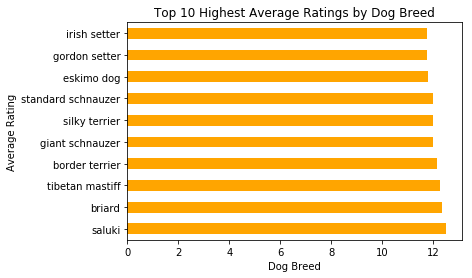

In [165]:
avg_rating_by_breed.nlargest(n=10).plot(kind='barh', color='orange')
plt.title('Top 10 Highest Average Ratings by Dog Breed')
plt.xlabel('Dog Breed')
plt.ylabel('Average Rating')
plt.savefig("data/rating_by_breed.png");

In [337]:
#look at average rating by breed where p1 confidence score >= 80%
confidence_df = df.query('p1_conf>=0.8')

avg_rating_by_breed_conf = confidence_df.groupby('p1').rating_numerator.mean()
avg_rating_by_breed_conf.sort_values(ascending=False)


p1
gordon setter                     14.000000
briard                            13.000000
great pyrenees                    12.500000
samoyed                           12.200000
yorkshire terrier                 12.000000
redbone                           12.000000
basset                            12.000000
tibetan mastiff                   12.000000
siberian husky                    12.000000
chesapeake bay retriever          12.000000
pembroke                          11.807692
golden retriever                  11.690476
norwegian elkhound                11.666667
bernese mountain dog              11.666667
french bulldog                    11.600000
saint bernard                     11.500000
miniature pinscher                11.500000
cardigan                          11.500000
labrador retriever                11.450000
chow                              11.428571
blenheim spaniel                  11.250000
american staffordshire terrier    11.200000
toy poodle                   

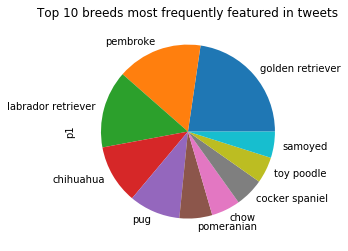

In [383]:
#most frequently occurring breed:

df_breeds = df.p1.value_counts()
df_breeds.nlargest(n=10).plot(kind='pie')
plt.title('Top 10 breeds most frequently featured in tweets');

In [342]:
#average rating by dog type

average_by_type = df.groupby('dog_type').rating_numerator.mean()
average_by_type.sort_values(ascending=False)

dog_type
puppo      11.923077
doggo      11.730769
floofer    11.400000
pupper     10.903846
None       10.827068
Name: rating_numerator, dtype: float64

**2. Most liked tweet by breed and by name**

In [347]:
df_most_liked = df.groupby('p1').favorite_count.mean()
df_most_liked.sort_values(ascending=False)

p1
saluki                         31079.000000
irish water spaniel            22392.000000
standard poodle                20986.600000
basset                         20208.833333
mexican hairless               17664.000000
cardigan                       17397.000000
afghan hound                   16423.000000
flat-coated retriever          16042.875000
french bulldog                 15555.611111
border terrier                 15338.000000
bedlington terrier             14764.000000
chesapeake bay retriever       12466.562500
samoyed                        12227.150000
golden retriever               12128.946237
blenheim spaniel               11891.666667
giant schnauzer                11796.000000
norwegian elkhound             11721.714286
tibetan mastiff                11534.000000
great pyrenees                 11429.166667
labrador retriever             10744.101695
australian terrier             10595.500000
pembroke                       10481.676923
boxer                        

In [348]:
df_most_liked = df.groupby('name').favorite_count.mean()
df_most_liked.sort_values(ascending=False)

name
Stephan       125799.000000
Aja            77732.000000
Lilly          69895.000000
Zoey           54204.000000
Gary           43887.500000
Alfy           43761.000000
Dewey          41742.000000
Emmy           40990.000000
Luna           39957.000000
Cupid          38225.000000
Phil           37480.000000
Hobbes         35969.000000
Bo             35475.666667
Maisey         35042.000000
Thor           34353.000000
Maya           34206.000000
Hurley         32839.000000
Vixen          32625.000000
Jimbo          31765.000000
quite          30164.000000
Paisley        29884.000000
Arya           29622.000000
Butter         29108.000000
Jim            28365.000000
Rory           28188.000000
Cermet         27894.000000
my             27808.000000
Venti          27268.000000
Nelly          27108.000000
Ted            26408.000000
                  ...      
Skye             514.000000
Andru            505.000000
Clarence         496.000000
Genevieve        489.000000
Naphaniel      

In [352]:
#average likes by dog type

average_by_type = df.groupby('dog_type').favorite_count.mean()
average_by_type.sort_values(ascending=False)

dog_type
puppo      16596.153846
doggo      15768.769231
None        8410.845865
floofer     7748.400000
pupper      7512.423077
Name: favorite_count, dtype: float64

**3. Most retweeted tweet by breed, dog type**

In [351]:
df_retweeted = df.groupby('p1').retweet_count.mean()
df_retweeted.sort_values(ascending=False)

p1
standard poodle                8663.000000
saluki                         6594.500000
irish water spaniel            5952.000000
afghan hound                   5883.500000
mexican hairless               5510.000000
cardigan                       5247.636364
flat-coated retriever          4237.250000
tibetan mastiff                3897.250000
border terrier                 3888.200000
basset                         3815.833333
french bulldog                 3694.666667
giant schnauzer                3571.333333
samoyed                        3535.550000
golden retriever               3408.129032
chihuahua                      3263.600000
bedlington terrier             3230.333333
chesapeake bay retriever       3208.312500
boxer                          3208.285714
norwegian elkhound             3201.000000
great pyrenees                 3157.166667
blenheim spaniel               2972.166667
labrador retriever             2970.508475
pembroke                       2890.200000
australi

In [353]:
#average retweets by dog type

average_by_type = df.groupby('dog_type').retweet_count.mean()
average_by_type.sort_values(ascending=False)

dog_type
doggo      5285.538462
puppo      5002.230769
floofer    2363.000000
None       2357.808271
pupper     2323.480769
Name: retweet_count, dtype: float64

**4. Number of likes & retweets over time**

In [168]:
import matplotlib.dates as mdates
%matplotlib inline


In [189]:
# df['favorite_count'].plot(style='g*', figsize=(12,8), label='Favorite count')
# df.retweet_count.plot(style='b*',label='Retweet count')
# fig, ax = plt.subplots()
# ax.plot(df['favorite_count'],df['timestamp'])

# myFmt = mdates("%Y")
# ax.xaxis.set_major_formatter(myFmt)

# fig.autofmt_xdate()
# plt.show()

In [ ]:


#read data from csv
data = pd.read_csv('data.csv', usecols=['date','count'], parse_dates=['date'])
#set date as index
data.set_index('date',inplace=True)

#plot data
fig, ax = plt.subplots(figsize=(15,7))
data.plot(ax=ax)

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

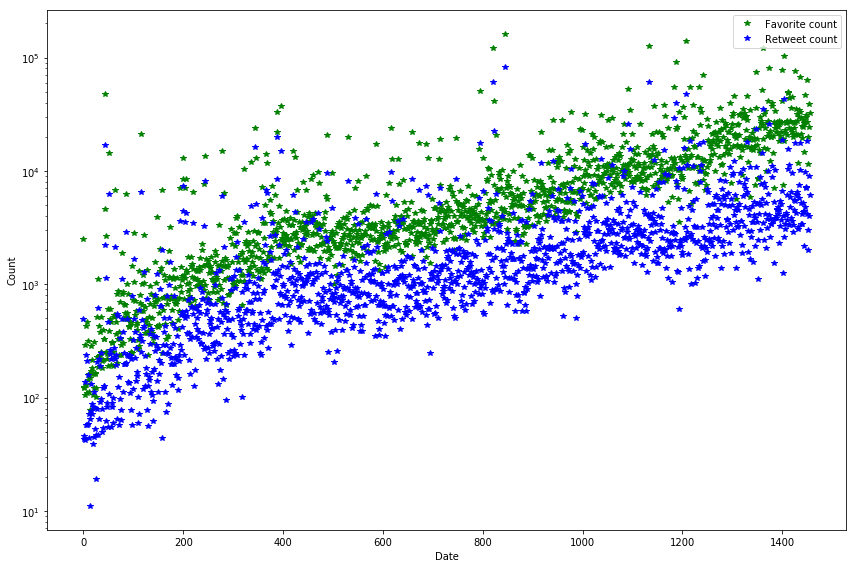

In [167]:
df['favorite_count'].plot(style='g*', figsize=(12,8), label='Favorite count')
df.retweet_count.plot(style='b*',label='Retweet count')
plt.legend()
plt.yscale("log")
plt.xlabel("Date")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("data/likes_over_time.png");


**CONCLUSIONS**

**1. Highest average rating by breed:**

Using p1 as the correct breed prediction, can see the highest rated breeds are 
1. Saluki, 
2. Briard and,
3. Tibetan mastiff. These are all uncommon breeds, meaning it could be likely they had a low confidence rating.

Using p1 with confidence scores >= 80%, the highest rated breeds are
1. Gordon Setter, 
2. Briard 
3. Great pyrenees

**Highest average rating by dog type:**
1. Puppo
2. Doggo
3. Floofer
4. Pupper


**2. Highest average likes by breed & name:**

1. Saluki (by a margin of nearly 30%!)
2. Irish water spaniel
3. Poodle

**Highest average likes by dog type:**
1. Puppo
2. Doggo
3. Floofer
4. Pupper

Most liked tweet contained a photo of a dog named Stephan. 

**3. Highest average re-tweets by breed:**

1. Standard poodle
2. Saluki
3. Irish water spaniel

**Highest average re-tweets by dog type:**

1. Doggo 
2. Puppo
3. Floofer
4. Pupper

**4. Re-tweets & likes over time**

Can see there is an obvious trend in an increase in likes and retweets over time. It would be interesting to compare this to the number of followers for the WeRateDogs account. This could also be due to an increase in the number of users or user engagement for twitter.

**Overall**

Seems that the saluki is a very well-liked breed, with highest average rating, highest average number of likes and 2nd highest average re-tweets. Tweets featuring a poodle, briard or irish water spaniel were also popular.

Puppos seemed to be the most popular, with floofers as a close second. 

The most common breeds featured in tweets were Golden Retrievers, Pembroke (corgi) and Labrador Retrievers. None of these breeds ranked in the top 3 for analysis of ratings, re-tweets or likes.

Likes and retweets increased over time, which is not surprising as this is likely correlated to the increase in number of followers for WeRateDogs, general uptake in twitter use, or increased popularity of following dog-related accounts. 

# Reporting for this Project

Create a 300-600 word written report called wrangle_report.pdf or wrangle_report.html that briefly describes your wrangling efforts. This is to be framed as an internal document.

Create a 250-word-minimum written report called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

Both of these documents can be created in separate Jupyter Notebooks using the Markdown functionality of Jupyter Notebooks, then downloading those notebooks as PDF files or HTML files (see image below). You might prefer to use a word processor like Google Docs or Microsoft Word, however